<a href="https://colab.research.google.com/github/AnaghBDeshpande/-6thSem-ML-Lab-/blob/main/1BM22CS037_Lab_3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BINARY CLASSIFICATION

1. HR_COMMA-SEP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std           

<Figure size 800x600 with 0 Axes>

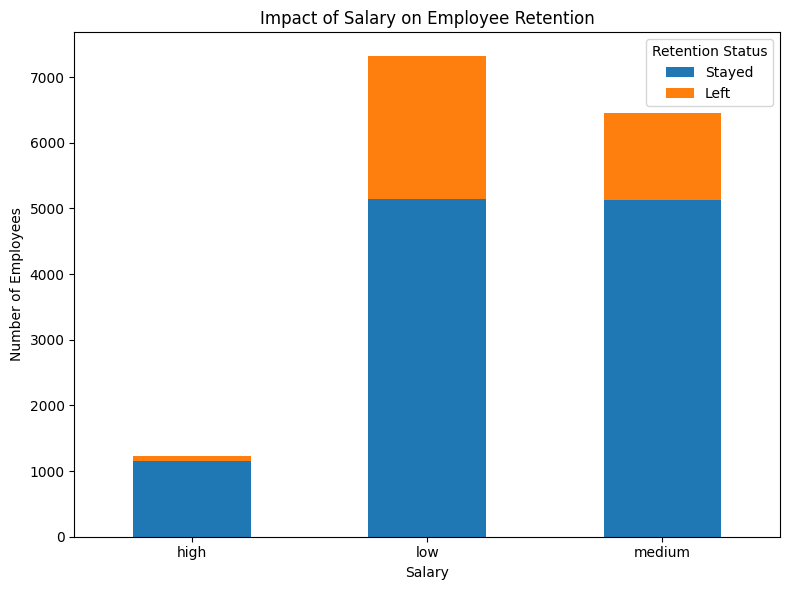

<Figure size 1000x600 with 0 Axes>

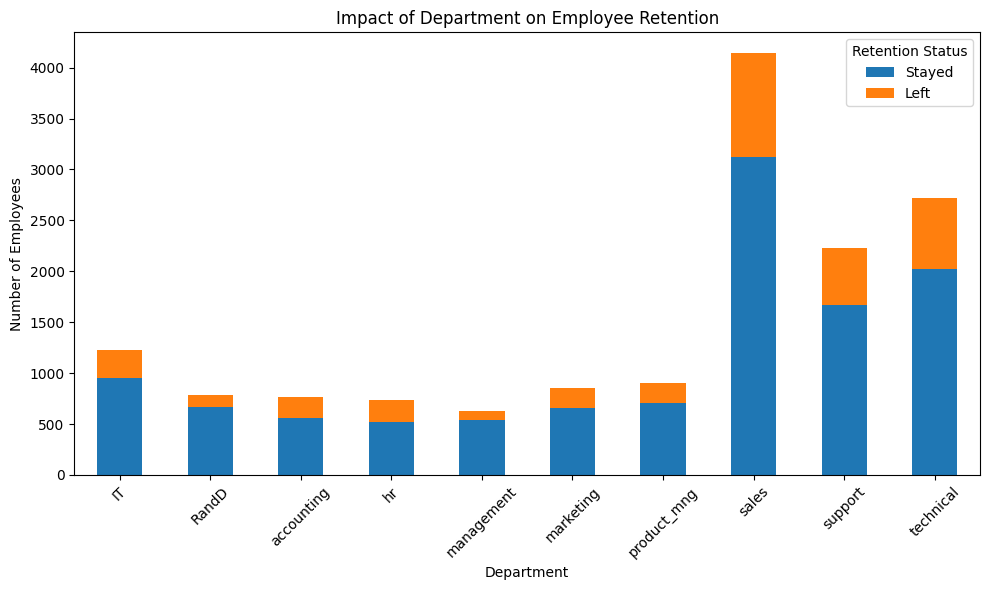

Accuracy of the Logistic Regression model: 78.23%


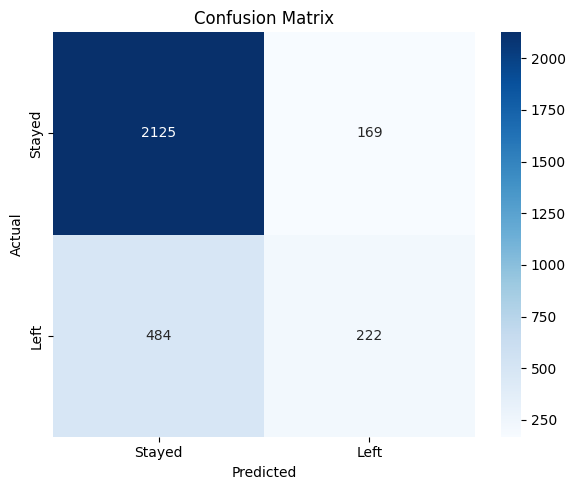

In [20]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 2: Load the dataset
df = pd.read_csv("HR_comma_sep.csv")

# Step 3: Basic exploratory data analysis (EDA)
print(df.info())  # Check basic info
print(df.describe())  # Summary statistics
print(df.head())  # Preview first few rows

# Step 4: Visualize the impact of salary on retention
plt.figure(figsize=(8, 6))
salary_retention = df.groupby(['salary', 'left']).size().unstack()
salary_retention.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8, 6))
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(title='Retention Status', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()

# Step 5: Visualize the correlation between department and retention
plt.figure(figsize=(10, 6))
department_retention = df.groupby(['Department', 'left']).size().unstack()
department_retention.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6))
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Retention Status', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()

# Step 6: Data Preprocessing
# Convert categorical columns into numerical variables
df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})
df['Department'] = df['Department'].map({'sales': 0, 'technical': 1, 'support': 2, 'IT': 3, 'product_mng': 4, 'marketing': 5, 'RandD': 6, 'accounting': 7, 'hr': 8, 'management': 9})

# Features (independent variables) and target (dependent variable)
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary', 'Department']]
y = df['left']

# Step 7: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Build logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 9: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 10: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy * 100:.2f}%')

# Step 11: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# MULTIPLE CLASSIFICATION

1. ZOO-DATA.CSV

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64
{np.int64(1): 0, np.int64(4): 1, np.int64(2): 2, np.int64(7): 3, np.int64(6): 4, np.int64(5): 5, np.int64(3): 6}
Accuracy of the Logistic Regression model: 95.24%


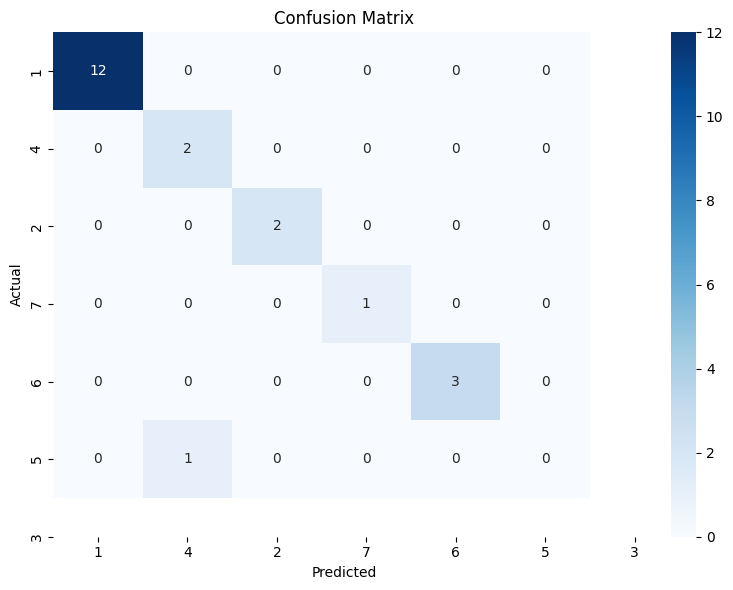

In [25]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 2: Load the datasets
zoo_data = pd.read_csv("zoo-data.csv")

# Step 3: Data Exploration and Preprocessing

# Check for missing values
print(zoo_data.isnull().sum())

# We can drop the 'animal_name' column as it is a non-numeric feature and won't help in prediction
zoo_data = zoo_data.drop(columns=['animal_name'])

# Convert 'class_type' to numerical categories (assuming it's categorical)
# If class_type is already numeric, you can skip this step
class_type_mapping = {label: idx for idx, label in enumerate(zoo_data['class_type'].unique())}
zoo_data['class_type'] = zoo_data['class_type'].map(class_type_mapping)

# Check the class_type mapping
print(class_type_mapping)

# Step 4: Split data into features (X) and target (y)
X = zoo_data.drop(columns=['class_type'])
y = zoo_data['class_type']

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 8: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy * 100:.2f}%')

# Step 9: Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_type_mapping.keys(), yticklabels=class_type_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


# SAMPLE DATASETSETS

1. INSURANCE DATASET FOR BINARY CLASSIFICATION

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0.37 is less than 0.5 which means person with 35 will not buy the insurance'

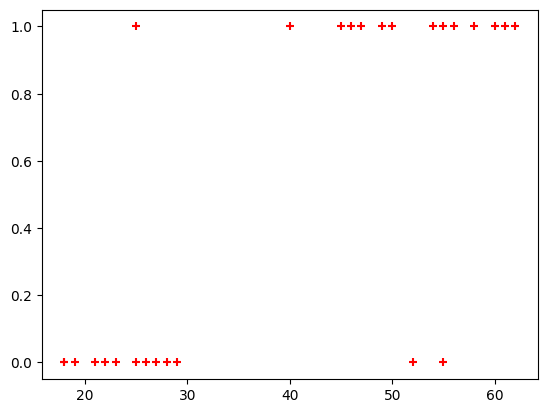

In [26]:
# -*- coding: utf-8 -*-
"""LogisticRegression_Binary.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1M8PXdcmPsrQtqyVXpET3sgghAMr_MCg5
"""

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline
#"%matplotlib inline" will make your plot outputs appear and be stored within the notebook.

df = pd.read_csv("/content/insurance_data.csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

"""0.37 is less than 0.5 which means person with 35 will not buy the insurance"""

2. IRIS DATASET FOR MULTIPLECLASS CLASSIFICATION

Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


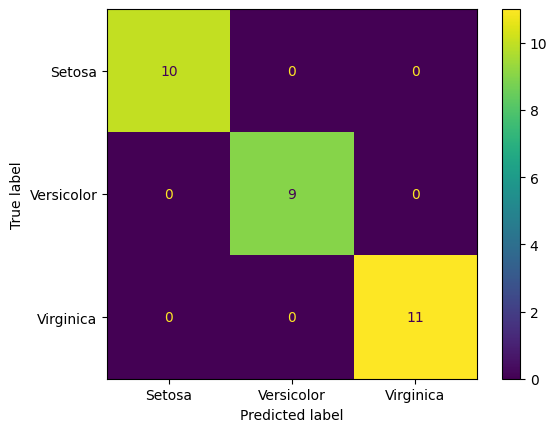

In [27]:
# -*- coding: utf-8 -*-
"""LogisticRegression_Multiclass.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1anBybVXILenh0a_R4aM_ZemLrEqYWnJl
"""

# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the Iris dataset
iris =  pd.read_csv("/content/iris.csv")
iris.head()

X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()